Question 2. By modifying the coefficients in the 2D Poisson solver, get the potential inside the circle of radius 1 in polar coordinates. 

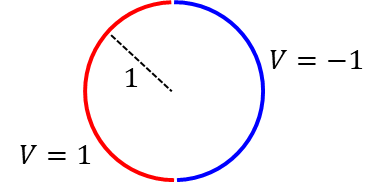


In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Get some parameters
N =int(100)  # num. meshes
r=float(1)        # radius
imax=int(1000)   # max step to iterate
tol=float(1e-5)   # error tolerence. something like 1e-5

In [3]:
# Setup arrays and parameters. 
dx=r/N    # mesh size in x
dy=r/N    # mesh size in y
x = np.linspace(-r, r, N)
y = np.linspace(-r, r, N)
X,Y=np.meshgrid(x,y) # Create a 2D mesh grid
u=0.0*X              # u-array, the potential
resid=0.0*X          # residue 

In [4]:
# boundary condition
for i in range(N) :
    for j in range(N) :
        if X[i,j]**2+Y[i,j]**2 >= 1 :
            if X[i,j] < 0 : u[i,j] = 1.0
            elif X[i,j] > 0 : u[i,j] = -1.0

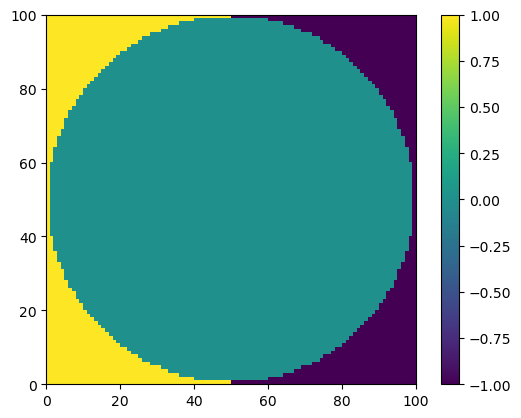

In [5]:
#plot initial potential
extn=[0,N,0,N]  
cs=plt.imshow(u,extent=extn); plt.colorbar(cs); plt.show()

In [6]:
# Jacobi spectral radius
rjac=(np.cos(np.pi/N) + (dx/dy)**2*np.cos(np.pi/N))/(1+(dx/dy)**2)

In [7]:
# initial error 
errf=sum(sum(np.fabs(u)))
err= errf  # initial error

In [8]:
# Coefficients
a=1.0
b=1.0
c=(dx/dy)**2
d=(dx/dy)**2
e=-2.0-2.0*(dx/dy)**2

In [9]:
# initial overrelaxation factor 
omega=1

In [10]:
i=0; 
Nx = N
Ny = N
for _ in range(imax):
    U_old = u.copy()
    
    # Update the potential
    for i in range(1, Nx-1):
        for j in range(1, Ny-1):
            if X[i, j]**2 + Y[i, j]**2 < 1.0: # Inside the circle
                u[i, j] = 0.25 * omega * (U_old[i-1, j] + U_old[i+1, j] + U_old[i, j-1] + U_old[i, j+1])
                + (1-omega) * U_old[i, j]

    # Check for convergence
    if np.allclose(u, U_old, atol=tol):
        break

In [11]:
# print out run info.
print("Number of iteration=",i)
print("Relative Error=",err/errf)

Number of iteration= 98
Relative Error= 1.0


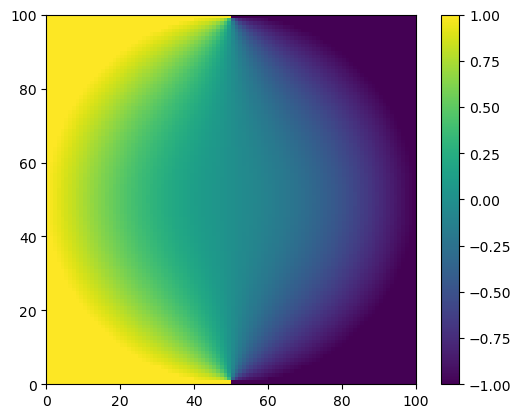

In [12]:
cs=plt.imshow(u,extent=extn); plt.colorbar(cs);  plt.show()